In [1]:
""" This is a Python demo for the Temporal Non-Local Means code. """
# engineering
import numpy as np
import matplotlib.pyplot as plt
# reading MRI files
import nibabel as nib
import nibabel.freesurfer.io as fsio
from nilearn import plotting, datasets, image
# import TNLM-related functions
from utils import *

c:\users\eric\appdata\local\programs\python\python36\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)
c:\users\eric\appdata\local\programs\python\python36\lib\importlib\_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)


In [2]:
Original = 	 "data/Original Rest/run-8.nii"
SmoothRest = "data/smoothed/saurun-8.nii"
Rest = 		 "data/Rest Unsmoothed/aurun-8.nii"
Structural = "data/Structural/run-3.nii"
Surface_lh = "data/surface/surf/lh.inflated.surf"
Surface_rh = "data/surface/surf/rh.inflated.surf"

In [3]:
"----------------------NifTI files--------------------------------"
"Original"
Original = nib.load(Original)
Original.get_data().shape

"Smoothed"
SmoothRest = nib.load(SmoothRest)
print("smooth: ", SmoothRest.get_data().shape)
s_img = SmoothRest.get_data()
#print(SmoothRest)

"UnSmoothed"
Rest = nib.load(Rest)
Rest.get_data().shape
print("no smooth: ", Rest.get_data().shape)
no_s_img = Rest.get_data()
#print(Rest)

smooth:  (128, 128, 39, 120)
no smooth:  (128, 128, 39, 120)


In [4]:
"--------------------------Surfaces files-----------------------------"
"Left Hemisphere (lh)"
(vertices_lh, faces_lh) = fsio.read_geometry(Surface_lh)
#print(vertices_lh, vertices_lh.shape, vertices_lh.dtype)

"Right Hemisphere (rh)"
(vertices_rh, faces_rh) = fsio.read_geometry(Surface_rh)
#print(vertices_rh, vertices_rh.shape, vertices_rh.dtype)

c:\users\eric\appdata\local\programs\python\python36\lib\site-packages\scipy\ndimage\measurements.py:305: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  return _nd_image.find_objects(input, max_label)


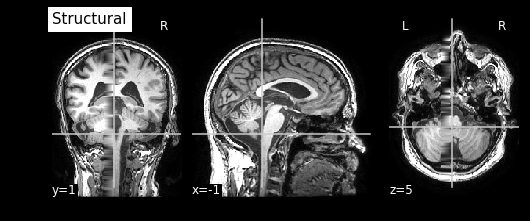

c:\users\eric\appdata\local\programs\python\python36\lib\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int32 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


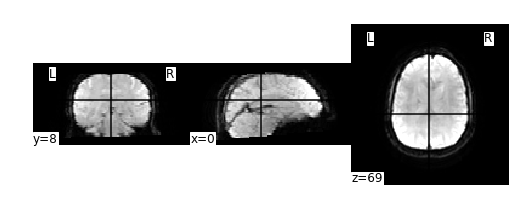

In [5]:
"""-------------------------------VISUALIZATION--------------------------------"""
"STRUCTURAL DATA"
Struct = nib.load(Structural)
plotting.plot_anat(Struct, title="Structural", vmin=5, vmax=3000)
plotting.show()

"FUNCTIONAL DATA"

"Access only one individual volume"
single_f_image = image.index_img(Original, 1)
plotting.plot_img(single_f_image,colorbar=False, vmin=0, vmax =8200,cmap='gray');
plotting.show()

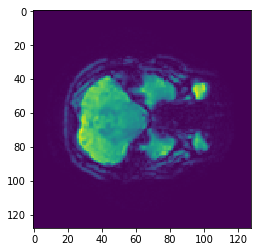

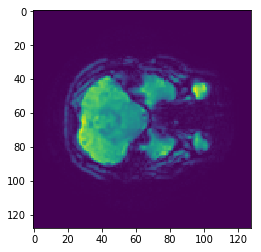

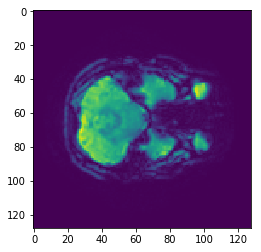

In [6]:
""" Sample plot of non-smoothed image. """
plt.figure()
plt.imshow(no_s_img[:, :, 5, 0])
plt.show()

plt.figure()
plt.imshow(no_s_img[:, :, 5, 5])
plt.show()

plt.figure()
plt.imshow(no_s_img[:, :, 5, 10])
plt.savefig("ejemplo.png")
plt.show()

In [7]:
""" Define params to run the algorithm. """
D = 7
H = 0.7
DIMS = 128
SLICE = 5 # Slice we're working on
K = 120   # number of timesteps to load

In [8]:
test_imgs = no_s_img[:, :, SLICE, :K]
test_imgs = np.rollaxis(test_imgs, 2, 0) 
test_imgs.shape

(120, 128, 128)

In [9]:
NEIGHS = {}

# first of all, calculate neighbors efficiently
for i in range(DIMS):
    for j in range(DIMS):
        NEIGHS[str(i)+str(j)] = neighbors([i,j], dims=DIMS, d=D)
    if i%31 == 0:
        print("row", i, "done")

row 0 done
row 31 done
row 62 done
row 93 done
row 124 done


In [10]:
WEIGHTS = {}

# key = pointA-pointB :: == example: "12-34"
for i in range(DIMS):
    for j in range(DIMS):
        vecino = NEIGHS[str(i)+str(j)]
        for v in vecino: 
            WEIGHTS[str(i)+str(j)+"-"+str(v[0])+str(v[1])] = weights(test_imgs, [i,j], v)[0,-1]
    if i%16 == 0:
        print("row", i, "done")

c:\users\eric\appdata\local\programs\python\python36\lib\site-packages\numpy\lib\function_base.py:2534: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]


row 0 done
row 16 done
row 32 done
row 48 done
row 64 done
row 80 done
row 96 done
row 112 done


In [11]:
print("w computed, gonna refine it")
for w in WEIGHTS:
    if np.isnan(WEIGHTS[w]):
        WEIGHTS[w] = 0

w computed, gonna refine it


In [12]:
# Timing
import time
tic = time.time()

processed = run(test_imgs, dims=DIMS, h=H, NEIGHS=NEIGHS, WEIGHTS=WEIGHTS, verbose=1)
    
tac = time.time()
%print("final time is:", tac-tic )

D:\Programming\PYTHON\CLASSES\tNLM\TNLM_python_julia\utils.py:35: RuntimeWarning: divide by zero encountered in long_scalars
  val = (1/np.sum(w_sr))*np.sum([d_rt[i]*w_sr[i] for i in range(len(n))])
D:\Programming\PYTHON\CLASSES\tNLM\TNLM_python_julia\utils.py:35: RuntimeWarning: invalid value encountered in double_scalars
  val = (1/np.sum(w_sr))*np.sum([d_rt[i]*w_sr[i] for i in range(len(n))])


Timestep 1 out of 120 completed
Timestep 2 out of 120 completed
Timestep 3 out of 120 completed
Timestep 4 out of 120 completed
Timestep 5 out of 120 completed
Timestep 6 out of 120 completed
Timestep 7 out of 120 completed
Timestep 8 out of 120 completed
Timestep 9 out of 120 completed
Timestep 10 out of 120 completed
Timestep 11 out of 120 completed
Timestep 12 out of 120 completed
Timestep 13 out of 120 completed
Timestep 14 out of 120 completed
Timestep 15 out of 120 completed
Timestep 16 out of 120 completed
Timestep 17 out of 120 completed
Timestep 18 out of 120 completed
Timestep 19 out of 120 completed
Timestep 20 out of 120 completed
Timestep 21 out of 120 completed
Timestep 22 out of 120 completed
Timestep 23 out of 120 completed
Timestep 24 out of 120 completed
Timestep 25 out of 120 completed
Timestep 26 out of 120 completed
Timestep 27 out of 120 completed
Timestep 28 out of 120 completed
Timestep 29 out of 120 completed
Timestep 30 out of 120 completed
Timestep 31 out of 

UsageError: Line magic function `%print("final` not found.


In [ ]:
%matplotlib notebook
display_imgs(processed, "Sample Preprocessing")